# Classification

## Importing libraries

In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

random_state = 42
np.random.seed(random_state)

## Preparing the dataset

In [2]:
df = pd.read_csv('bank-full.csv', sep=";")
df = df[['age', 'job', 'marital', 'education', 'balance', 
         'housing', 'contact', 'day', 'month', 'duration', 
         'campaign', 'pdays', 'previous', 'poutcome', 'y']]
f'{(df.isnull().sum() > 0).sum()} columns in the dataset have missing values'

'0 columns in the dataset have missing values'

## Question 1

In [3]:
f"Most frequent observation (mode) for the column 'education' is '{df['education'].mode()[0]}'"

"Most frequent observation (mode) for the column 'education' is 'secondary'"

## Question 2

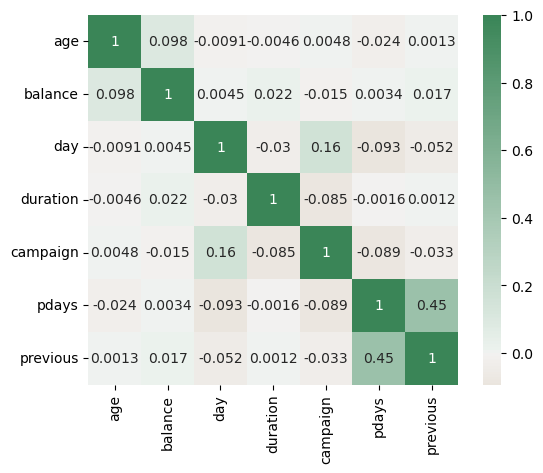

In [4]:
correlation_df = df.select_dtypes(include='number').corr()
axis_corr = sns.heatmap(correlation_df, annot=True, center=0, cmap=sns.diverging_palette(50, 500, n=500), square=True)
plt.show()

In [5]:
feature_pairs = [('age', 'balance'), ('day', 'campaign'), ('day', 'pdays'), ('pdays', 'previous')]
pair = ()
max_corr = 0
for f1, f2 in feature_pairs:
    corr = abs(correlation_df[f1][f2])
    if corr > max_corr:
        max_corr = corr
        pair = f1,f2
f"'{pair[0]}' and '{pair[1]}' features have the biggest correlation"

"'pdays' and 'previous' features have the biggest correlation"

## Target encoding

In [6]:
y = df['y'].map({'yes': 1, 'no': 0})
x = df.drop('y', axis=1)

## Split the data

In [25]:
train_data, temp_data = train_test_split(x, test_size=0.4, random_state=random_state)
y_train = y[train_data.index]
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=random_state)
y_val = y[val_data.index]
y_test = y[test_data.index]

## Question 3

In [8]:
train_cat = train_data.select_dtypes(exclude=["number"])
mi_scores = train_cat.apply(lambda s: mutual_info_score(s, y[s.index]))
f"'{mi_scores.idxmax()}' has the biggest mutual information score"

"'poutcome' has the biggest mutual information score"

## Question 4

In [87]:
def prepare_train(train_data):  
    train_dict = train_data.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    return X_train, dv

def prepare_val(val_data, dv):
    val_dict = val_data.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    return X_val

def train_model(X_train, y_train, C):
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=random_state)
    model.fit(X_train, y_train)
    return model

def count_accuracy(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = (y_pred == y_val).mean()
    return accuracy

In [88]:
def train_and_validate(train_data, val_data, y_train, y_val, C=1.0):
    X_train, dv = prepare_train(train_data)
    X_val = prepare_val(val_data, dv)
    model = train_model(X_train, y_train, C)
    original_accuracy = count_accuracy(model, X_val, y_val)
    return original_accuracy

In [89]:
original_accuracy = train_and_validate(train_data, val_data, y_train, y_val)
f"Accuracy on the validation dataset is {round(original_accuracy, 2)}"

'Accuracy on the validation dataset is 0.9'

## Question 5

In [86]:
min_difference = float('inf')
min_column = ''
#for column in train_data.columns:
for column in ['age', 'balance', 'marital', 'previous']:
    train_drop = train_data.drop(column, axis=1)
    val_drop = val_data.drop(column, axis=1)
    accuracy = train_and_validate(train_drop, val_drop, y_train, y_val)
    difference = original_accuracy - accuracy
    if difference < min_difference:
        min_column = column
        min_difference = difference
f"{min_column} has the smallest difference"

'previous has the smallest difference'

## Question 6

In [95]:
best_accuracy = 0
best_C = 0
for C in [0.01, 0.1, 1, 10, 100]:
    accuracy = train_and_validate(train_data, val_data, y_train, y_val, C)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C
f"C equal {best_C} leads to the best accuracy on the validation set"

'C equal 1 leads to the best accuracy on the validation set'